<a href="https://colab.research.google.com/github/justcating/pypairs/blob/main/%D0%94%D0%97_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

[Опис даних](https://search.r-project.org/CRAN/refmans/PPtreeregViz/html/insurance.html)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/insurance.csv")
df = df.select_dtypes('number')

In [3]:
df.head()

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86


# Завдання 1
Виведіть основні числові характеристики та кількість пропущених значень по стовпчиках

In [4]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [5]:
 df.isna().sum()

,0
age,0
bmi,0
children,0
expenses,0


# Завдання 2
Розділіть дані на залежну y(`expenses`) та незалежну X ознаки. Розділіть дані на тренувальну та тестову частини

In [6]:
y = df['expenses']
X = df[['age','bmi','children']]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8,
                                                    random_state=42)

# Завдання 3
Натренуйте LinearRegression та виведіть такі метрики: MAE, RMSE, R2

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)
y_pred.mean()

13317.07554132879

In [11]:
mae = mean_absolute_error(y_test, y_pred)
mae

9181.192587066631

In [14]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

11453.759636393332

In [15]:
r2 = r2_score(y_test, y_pred)
r2

0.1549779076526725

# Завдання 4
Напишіть рівняння регресії за прикладом:
Ціна = 1.02*Температура - 15.6

In [17]:
b0 = model.intercept_
b1, b2, b3 = model.coef_
print(f"Expenses = {b1:.2f} * age + {b2:.2f} * bmi + {b3:.2f} * children {b0:.2f}")

Expenses = 220.73 * age + 332.65 * bmi + 563.40 * children -6131.42


# Завдання 5 (оптимально)
Перевірте як видалення викидів вплине на результат. Розгляньте один з варіантів:
* видалення викидів по стовпчику `expenses`
* видалення викидів по всіх стовпчиків

<Axes: ylabel='Frequency'>

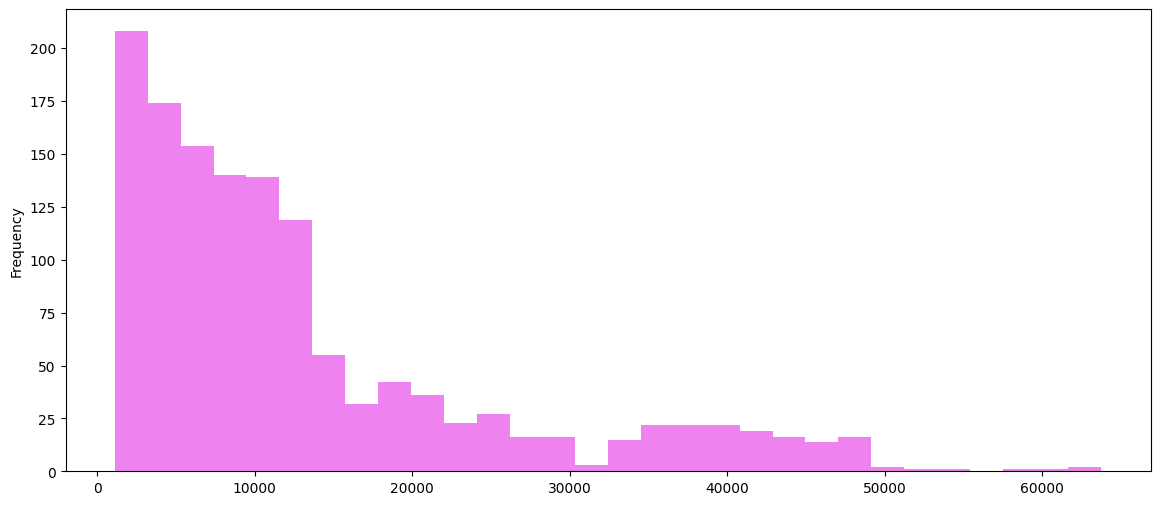

In [19]:
df['expenses'].plot(kind = 'hist', bins=30, color='violet', figsize=(14,6))

<Axes: >

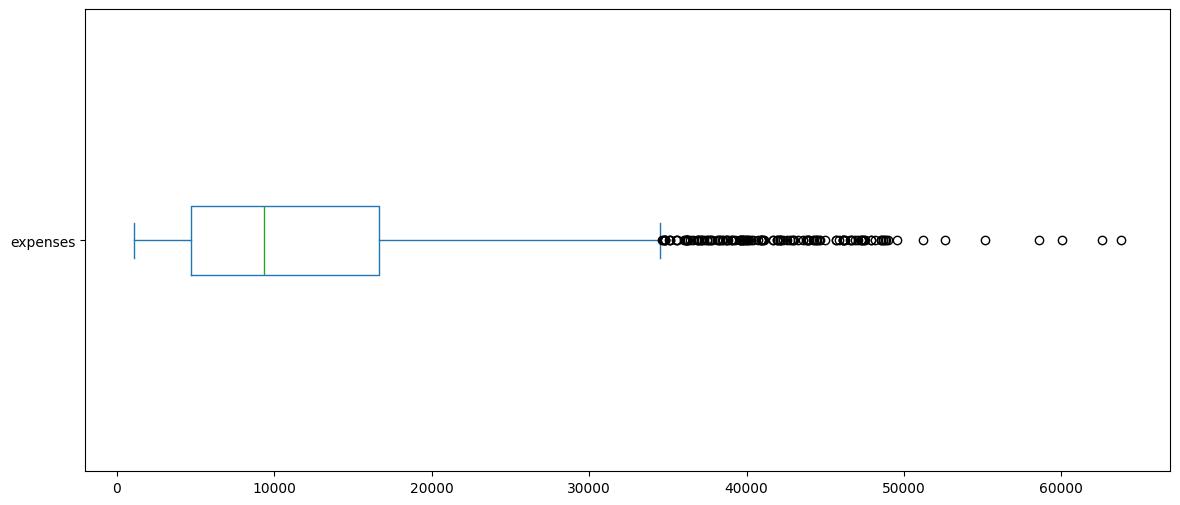

In [20]:
df['expenses'].plot(kind='box', vert = False, figsize=(14,6))

In [21]:
y2 = df['expenses']
X2 = df[['age','bmi','children']]
mask = (df['expenses'] < 49500)

y2 = y2[~mask]
X2 = X2[~mask]

In [22]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2,
                                                        train_size = .8,
                                                        random_state=42)

model2 = LinearRegression()
model2.fit(X_train2, y_train2)

LinearRegression()

In [23]:
y_pred2 = model2.predict(X_test2)
y_pred2.mean()

46407.36281877696

In [24]:
mae2 = mean_absolute_error(y_test2, y_pred2)
mae2

15488.552181223044

In [25]:
rmse2 = np.sqrt(mean_squared_error(y_test2, y_pred2))
rmse2

18862.07604732676

In [26]:
r22 = r2_score(y_test2, y_pred2)
r22

-100.25142471878513

In [27]:
# результат став набагато гірше ніж був до видалення викидів.